In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merged_n = pd.read_csv(r'/content/drive/MyDrive/Dissertation_10862121/merged_n.csv')
merged_d = pd.read_csv(r'/content/drive/MyDrive/Dissertation_10862121/merged_d.csv')

In [ ]:
merged_n['GMT'] = pd.to_datetime(merged_n['GMT'])
merged_n['Date'] = pd.to_datetime(merged_n['Date'])
merged_n.set_index('GMT', inplace=True)

In [ ]:
merged_d['GMT'] = pd.to_datetime(merged_d['GMT'])
merged_d['Date'] = pd.to_datetime(merged_d['Date'])
merged_d.set_index('GMT', inplace=True)

In [ ]:
merged_n['Consumption Per Household'] = merged_n['Total Household Consumption (N)'] / 4173
merged_d['Consumption Per Household'] = merged_d['Total Household Consumption (D)'] / 1025

In [ ]:
merged_n.describe()

,Total Household Consumption (N),Year,Month,Day,Hour,DayOfWeek,Hourly Global Radiation (KJ/m2),Hourly Maximum Gust (kn),Hourly Mean Wind Direction (o),Hourly Mean Windspeed (kn),Hourly Pressure at Mean Sea Level (hPa),Hourly Rainfall Total (mm),Hourly Relative Humidity (%),Hourly Snow Depth (cm),Hourly Temperature (C),Hourly Total Cloud Cover (oktas)\n,Hourly Visibility (dm),Consumption Per Household
count,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,1741.908178,2013.0,6.526027,15.720548,11.500000,2.994521,419.198421,13.623415,188.438185,7.341098,1015.188538,0.080647,76.964981,0.052911,10.419904,5.100266,2421.355594,0.417423
std,624.741720,0.0,3.448048,8.796749,6.922582,2.000107,696.209054,6.584945,88.042196,3.640448,10.289586,0.343273,15.090821,0.451105,6.540530,2.866701,1274.053187,0.149710
min,799.946338,2013.0,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.800000,976.500000,0.000000,21.971429,0.000000,-4.428571,0.000000,30.000000,0.191696
25%,1261.526631,2013.0,4.000000,8.000000,5.750000,1.000000,0.000000,8.600000,102.000000,4.600000,1009.075000,0.000000,67.557143,0.000000,5.400000,2.333333,1366.666667,0.302307
50%,1670.779844,2013.0,7.000000,16.000000,11.500000,3.000000,16.333333,12.800000,212.000000,7.000000,1015.750000,0.000000,80.169048,0.000000,10.114286,6.333333,2433.333333,0.400379
75%,2098.414616,2013.0,10.000000,23.000000,17.250000,5.000000,569.500000,17.400000,254.000000,9.400000,1022.425000,0.000000,89.357143,0.000000,15.189286,7.666667,3400.000000,0.502855
max,3970.438521,2013.0,12.000000,31.000000,23.000000,6.000000,3290.333333,56.400000,356.000000,27.200000,1040.050000,7.120000,98.971429,6.500000,32.057143,9.000000,6666.666667,0.951459


Feature Importance

In [ ]:
features = [
    "Hourly Global Radiation (KJ/m2)",
    "Hourly Maximum Gust (kn)",
    "Hourly Mean Wind Direction (o)",
    "Hourly Mean Windspeed (kn)",
    "Hourly Pressure at Mean Sea Level (hPa)",
    "Hourly Rainfall Total (mm)",
    "Hourly Relative Humidity (%)",
    "Hourly Snow Depth (cm)",
    "Hourly Temperature (C)",
    "Hourly Total Cloud Cover (oktas)\n",
    "Hourly Visibility (dm)"
]

X = merged_n[features]
y = merged_n['Total Household Consumption (N)']

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
feature_importance = rf.feature_importances_

In [ ]:
importance = sorted(zip(features, feature_importance), key=lambda x:x[1], reverse=True)
for feature, score in importance:
    print(f"{feature}: {score}")

Hourly Temperature (C): 0.19618008240893928
Hourly Global Radiation (KJ/m2): 0.15705380679269043
Hourly Relative Humidity (%): 0.1314947455260157
Hourly Pressure at Mean Sea Level (hPa): 0.11648145215216807
Hourly Mean Wind Direction (o): 0.08944601477725529
Hourly Visibility (dm): 0.07786256683721154
Hourly Total Cloud Cover (oktas)
: 0.07211427058564182
Hourly Maximum Gust (kn): 0.0670891834708998
Hourly Mean Windspeed (kn): 0.06610754739545306
Hourly Rainfall Total (mm): 0.017130597032780765
Hourly Snow Depth (cm): 0.009039733020944418


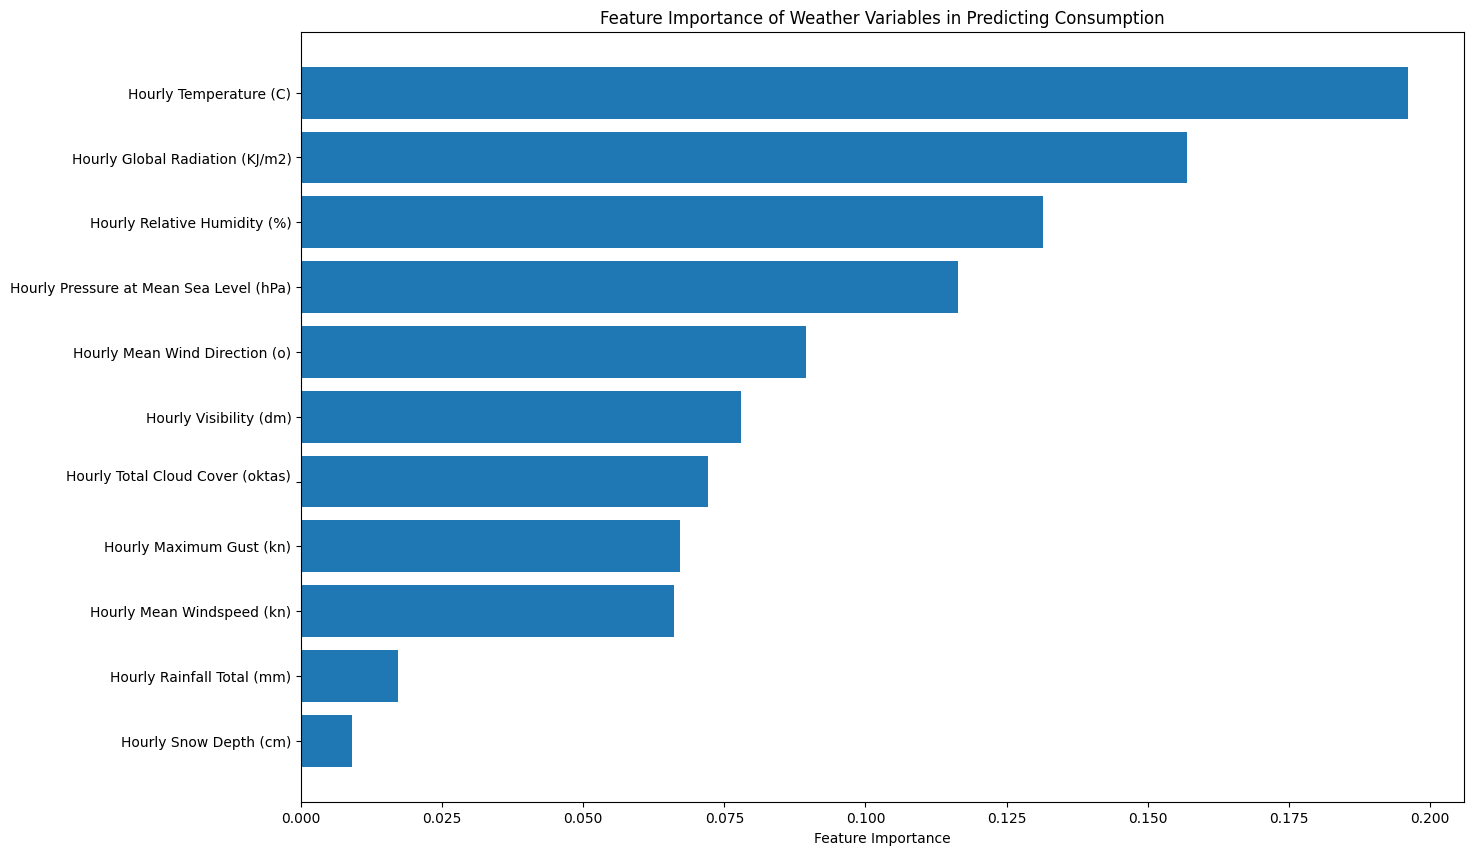

In [ ]:
plt.figure(figsize=(15,10))
sorted_idx = feature_importance.argsort()
plt.barh([features[i] for i in sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title('Feature Importance of Weather Variables in Predicting Consumption')
plt.show()